In [3]:
datos <- read.table('../clase18/GRB_afterglow.dat.txt', header=T, skip=1)

In [4]:
flux <- datos$f

1. Implementar una función MME.gamma que tenga por argumento un conjunto de datos $x = (x 1 , . . . , x n )$ y devuelva los estimadores de momentos de α y λ.

### Distribución Gamma:

$\large X_i \sim \Gamma(\alpha, \lambda)$

$$\large f(x) = \frac {\lambda^\alpha}{\Gamma(\alpha) } x^{\alpha - 1} e^{-\lambda x} $$

### Estimadores de momentos de una distribución Gamma

$$\large \tilde \alpha = \frac {n \bar X_n^2}{\sum_{i=1}^n (X_i - \bar X_n)^2}$$

$$\large \tilde \lambda = \frac {n \bar X_n}{\sum_{i=1}^n (X_i - \bar X_n)^2}$$


# 1.

In [5]:
MME.gamma <- function(X){
    n <- length(X)
    alpha <- n*(mean(X)^2) / sum((X - mean(X))^2)
    lambda <- n*(mean(X)) / sum((X - mean(X))^2)
    return(c(alpha,lambda))
}

# 2.

2. Suponiendo que los datos de flux provienen de una población con distribución Gamma,
estimar α y λ usando la función MME.gamma.

In [6]:
params.MME <- MME.gamma(flux)
alpha.MME  <- params.MME[1]
lambda.MME <- params.MME[2]
params.MME

[1] 1.38736622 0.04028012

# 3.

3. Estimar P (X ≤ 40) usando las estimaciones obtenidas y el método plug–in, es decir
reemplazando cada parámetro por su valor estimado. Comparar con las estimaciones
obtenidas en la Guı́a de clase.

In [7]:
t <- 40
p.Xleq40 <- pgamma(q=t, shape=alpha.MME, rate=lambda.MME)
p.Xleq40

[1] 0.6785147

# 4.

4. Graficar la empı́rica asociada a los datos flux y superponer la función de distribución
acumulada Gamma con los parámetros que considere pertinentes. Comparar con los
gráficos obtenidos en la Guı́a de clase.

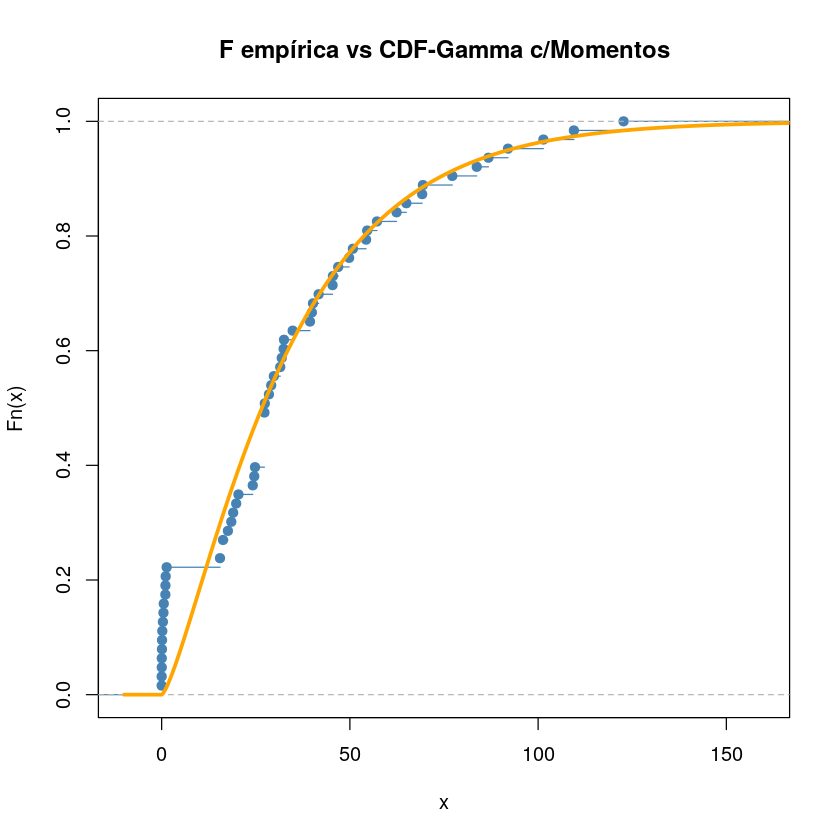

In [8]:
grid.x <- seq(-10,170, 0.1)
plot(ecdf(flux), col='steelblue', main="F empírica vs CDF-Gamma c/Momentos",xlim=c(-10,160))
lines(grid.x, pgamma(grid.x, shape=alpha.MME, rate=lambda.MME),col='orange', lwd=3)

# 5.

5. Realizar un histograma para los datos de flux y superponer la función de densidad
gamma con los parámetros que considere pertinentes.

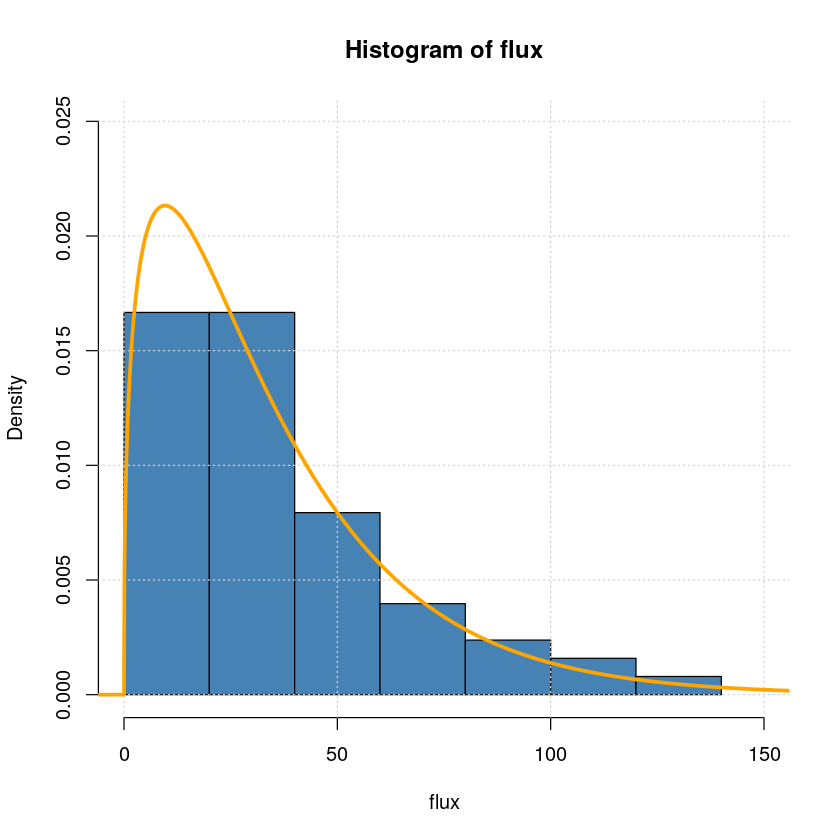

In [9]:
hist(flux, col='steelblue', prob=T, ylim=c(0, 0.025), xlim=c(0,150))
grid()
lines(grid.x, dgamma(grid.x, shape=alpha.MME, rate=lambda.MME),col='orange', lwd=3)

# 6.

6. Bajo el mismo supuesto, calcular los estimadores de máxima verosimilitud de α y
λ. Explorar el comando `fitdistr` de la libreria MASS. Comparar con los valores
obtenidos en ı́tems anteriores.
Repetir los tres ı́tems anteriores y comparar los resultados obtenidos.

Verosimilitud

$$\large \begin{align}
L(\alpha,\lambda; \mathbf x) &= \prod_{i=1}^n f(x_i,\alpha, \lambda) \\
 &= \prod_{i=1}^n \frac {\lambda^\alpha}{\Gamma(\alpha) } x_i^{\alpha - 1} e^{-\lambda x_i}  \\
 &= \frac {\lambda^{n \alpha}}{\Gamma(\alpha)^n}  e^{-\lambda \sum_{i=1}^n x_i} \left( \prod_{i=1}^n x_i \right) ^{\alpha - 1} \\
\end{align}$$

Aplicando log

$$\large \mathcal l(\alpha,\lambda;\mathbf x) = n \ \alpha \ \text{log}(\lambda) - n \ \text{log}(\Gamma(\lambda)) + (\alpha-1) \sum_{i=1}^n \text{log}(x_i) - \lambda \sum_{i=1}^n x_i$$

In [10]:
library("MASS")

In [11]:
params.MLE <- fitdistr(x=flux, densfun="gamma")
params.MLE$estimate

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”

shape      rate 
0.5493510 0.0159496

In [12]:
params.MLE <- fitdistr(x=flux, densfun="gamma", start=list(shape = alpha.MME, rate = lambda.MME))
params.MLE$estimate

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”

shape       rate 
0.54946697 0.01596015

In [13]:
alpha.MLE  <- params.MLE$estimate[1]
lambda.MLE <- params.MLE$estimate[2]

In [14]:
t <- 40
p.Xleq40 <- pgamma(q=t, shape=alpha.MLE, rate=lambda.MLE)
p.Xleq40

[1] 0.7135365

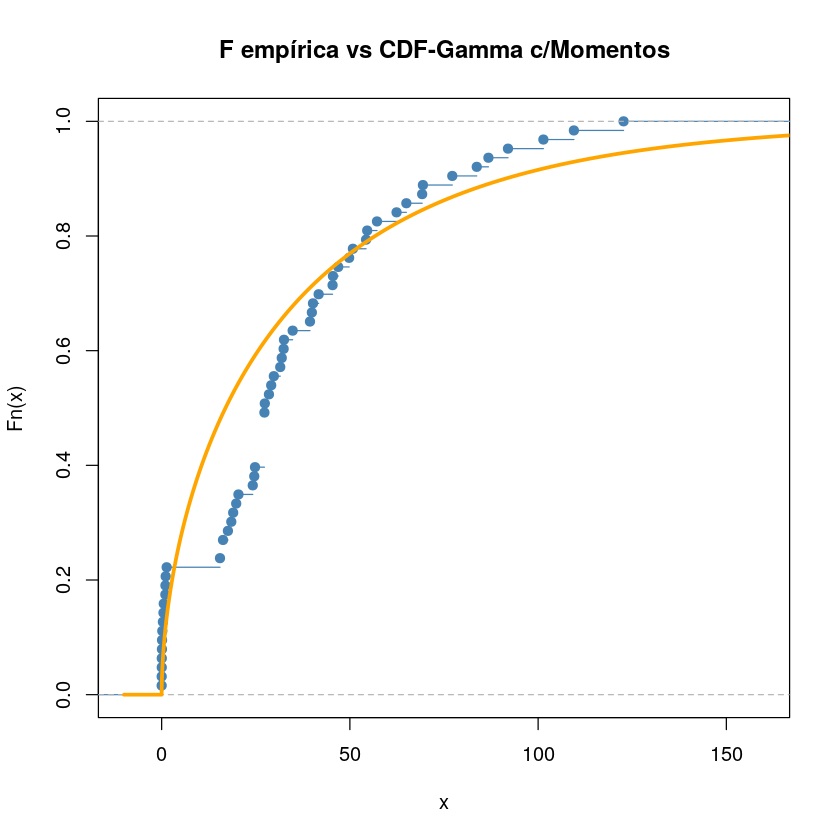

In [15]:
grid.x <- seq(-10,170, 0.01)
plot(ecdf(flux), col='steelblue', main="F empírica vs CDF-Gamma c/Momentos",xlim=c(-10,160))
lines(grid.x, pgamma(grid.x, shape=alpha.MLE, rate=lambda.MLE),col='orange', lwd=3)

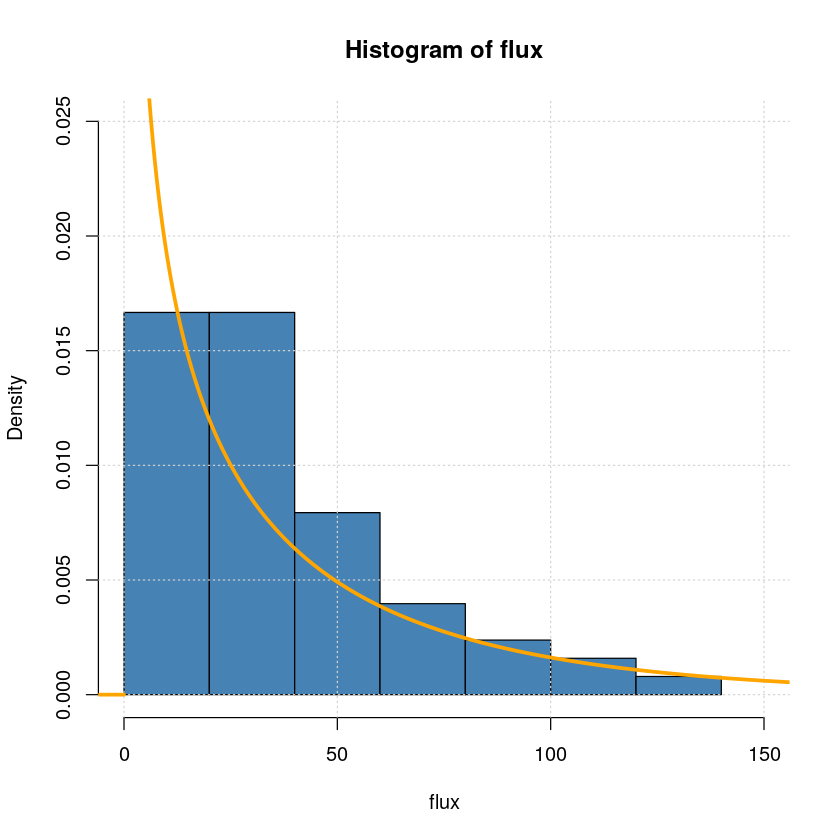

In [16]:
hist(flux, col='steelblue', prob=T, ylim=c(0, 0.025), xlim=c(0,150))
grid()
lines(grid.x, dgamma(grid.x, shape=alpha.MLE, rate=lambda.MLE),col='orange', lwd=3)

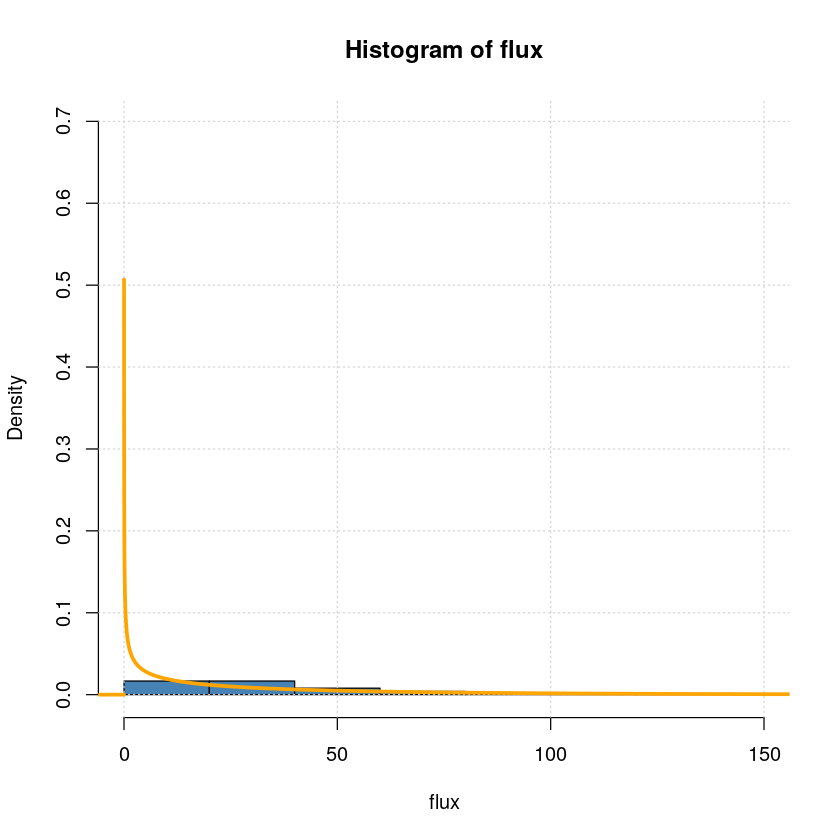

In [17]:
hist(flux, col='steelblue', prob=T, ylim=c(0, 0.7), xlim=c(0,150))
grid()
lines(grid.x, dgamma(grid.x, shape=alpha.MLE, rate=lambda.MLE),col='orange', lwd=3)

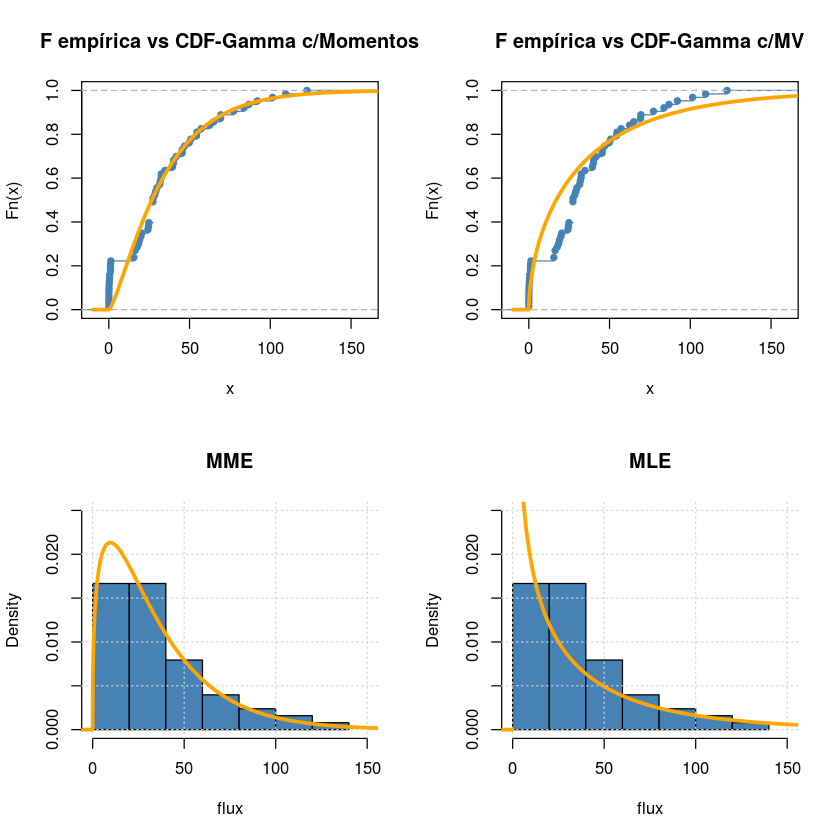

In [18]:
par(mfrow=c(2,2))
plot(ecdf(flux), col='steelblue', main="F empírica vs CDF-Gamma c/Momentos",xlim=c(-10,160))
lines(grid.x, pgamma(grid.x, shape=alpha.MME, rate=lambda.MME),col='orange', lwd=3)
#
plot(ecdf(flux), col='steelblue', main="F empírica vs CDF-Gamma c/MV",xlim=c(-10,160))
lines(grid.x, pgamma(grid.x, shape=alpha.MLE, rate=lambda.MLE),col='orange', lwd=3)
#
hist(flux, col='steelblue', prob=T, ylim=c(0, 0.025), xlim=c(0,150),main="MME")
grid()
lines(grid.x, dgamma(grid.x, shape=alpha.MME, rate=lambda.MME),col='orange', lwd=3)
#
hist(flux, col='steelblue', prob=T, ylim=c(0, 0.025), xlim=c(0,150),main="MLE")
grid()
lines(grid.x, dgamma(grid.x, shape=alpha.MLE, rate=lambda.MLE),col='orange', lwd=3)

# 7. 
7. Estimar por el método de Máxima Verosimilitud el flux medio a partir de los datos.
¿Con qué valor podrı́a comparar esta estimación?

In [19]:
flux.medio.MLE <- alpha.MLE / lambda.MLE
names(flux.medio.MLE) <- "media.MLE"
flux.medio.MLE

media.MLE 
 34.42742

In [20]:
flux.medio.no.param <- mean(flux)
names(flux.medio.no.param) <- "media.no.param"
flux.medio.no.param

media.no.param 
      34.44295

# 8.

8. Estimar por el método plug–in la mediana de flux. Explorar el comando qgamma())

In [21]:
mediana.MME <- qgamma(0.5, shape=alpha.MME, rate=lambda.MME)
mediana.MLE <- qgamma(0.5, shape=alpha.MLE, rate=lambda.MLE)
mediana.no.param <- median(flux)

In [22]:
mediana.MME
mediana.MLE
mediana.no.param

[1] 26.61185

[1] 16.95257

[1] 27.4

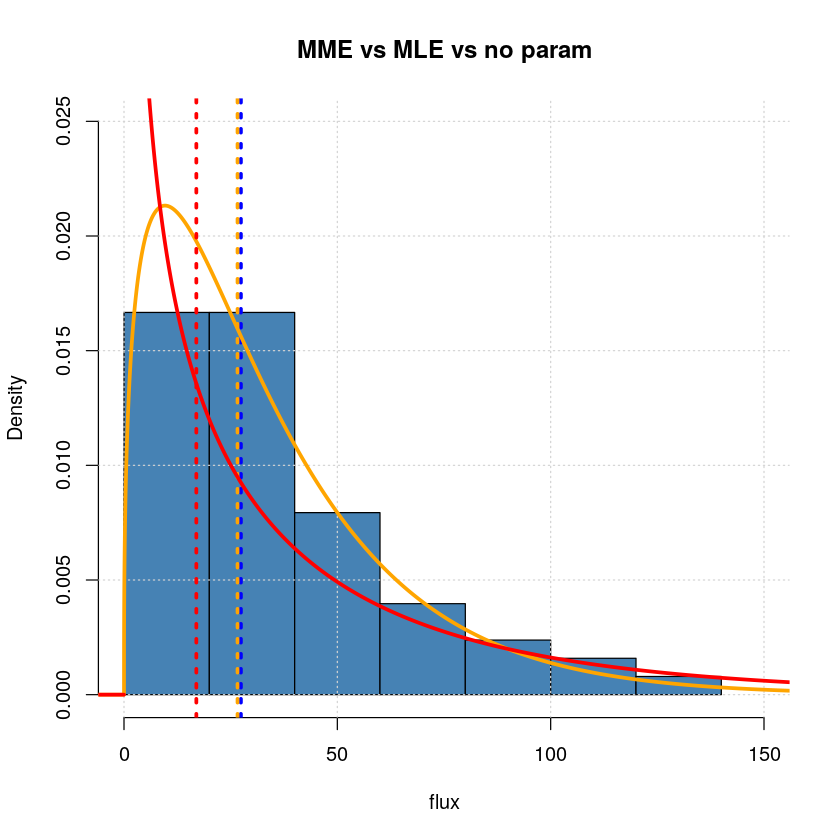

In [23]:
hist(flux, col='steelblue', prob=T, ylim=c(0, 0.025), xlim=c(0,150),main="MME vs MLE vs no param")
grid()
abline(v=mediana.no.param, col='blue', lwd=3, lty=3)
lines(grid.x, dgamma(grid.x, shape=alpha.MME, rate=lambda.MME),col='orange', lwd=3)
abline(v=mediana.MME,col='orange', lwd=3, lty=3)
lines(grid.x, dgamma(grid.x, shape=alpha.MLE, rate=lambda.MLE),col='red', lwd=3)
abline(v=mediana.MLE,col='red', lwd=3, lty=3)

In [25]:
grid.a <- seq(0.2,0.8,0.01)
grid.l <- seq(0.005,0.02,0.001)
a.m.params <- matrix(nrow=length(grid.a),ncol=length(grid.l))
l.m.params <- matrix(nrow=length(grid.a),ncol=length(grid.l))

In [ ]:
i <- 1
for(sa in grid.a){
    j <- 1
    for(sl in grid.l){
        params = fitdistr(x=flux, densfun="gamma", start=list(shape = sa, rate = sl))
        a.MLE <- params$estimate[1]
        l.MLE <- params$estimate[2]
        a.m.params[i,j] <- a.MLE
        l.m.params[i,j] <- l.MLE
        j <- j+1
    }
    i <- i+1
}
    

Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm[1], parm[2], ...):
“NaNs produced”Warning message in densfun(x, parm

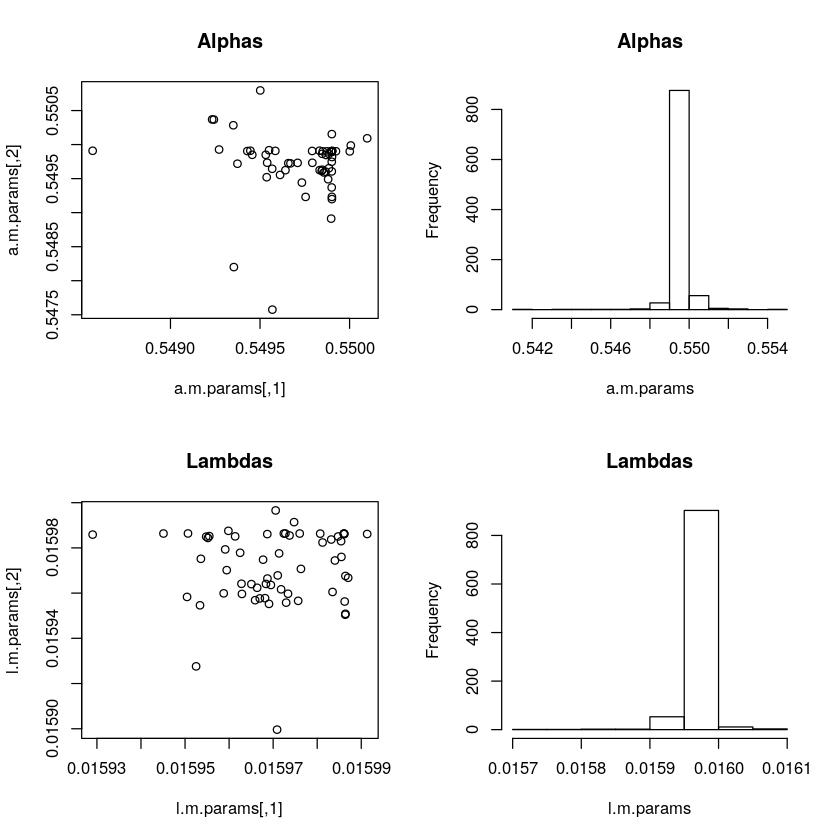

In [28]:
par(mfrow=c(2,2))
plot(a.m.params, main="Alphas")
hist(a.m.params, main="Alphas")
plot(l.m.params, main="Lambdas")
hist(l.m.params, main="Lambdas")